# Assignment 2: Working with health data from wearables

## Data

In this assigment you will use the [Daily Sports and Activities](http://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities) dataset from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html). This dataset contains motion sensor data of 19 daily and sports activities (walking, running, rowing, jumping,...), each performed by 8 subjects in their own style for 5 minutes. Five Xsens MTx units are used on the torso, (right and left) arms, and (right and left) legs.

----

## Objectives

- Understand time-series health data
- Perform pre-processing and visualisation on time-series data
- Extract features from time-series data
- Train a classifier to predict the activity the users are doing

----

## Exercise 1

Load, analyse and visualise the (temporal) data of the different sensors for subject 7 (p7). Compare walking on a treadmill with a speed of 4 km/h on a flat surface (a10) and running on a treadmill with a speed of 8 km/h (a12). Do you see any difference? Comment.


## Solution to exercise 1

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
a10 = pd.read_csv('/content/drive/MyDrive/MASTER/SECOND SEMESTER/Health/Second assignment/data/a10/p7/s01.txt', header = None) #if not we are missing one row
a12 = pd.read_csv('/content/drive/MyDrive/MASTER/SECOND SEMESTER/Health/Second assignment/data/a12/p7/s01.txt', header = None)

In [80]:
a10.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,9.3105,0.587000,-1.22880,-0.24365,-1.10660,0.037636,-0.72318,0.12456,-0.70206,5.0612,...,0.076493,-9.8361,-0.18946,-1.56540,-0.407760,0.37506,1.13070,1.0211,0.36735,-0.16518
1,12.0460,-0.086358,0.52566,-0.17974,0.85106,0.270410,-0.72236,0.13881,-0.69857,5.3809,...,0.081997,-9.1952,-2.43550,-0.94815,-0.036454,0.27783,0.87566,1.0460,0.34339,-0.18973
2,9.2470,-2.045200,10.73400,-1.55140,-0.60079,0.369790,-0.71560,0.16523,-0.70152,4.9954,...,0.075714,-8.5541,0.87487,-2.19080,-0.636590,0.42847,0.99528,1.0615,0.33070,-0.19799
3,7.4230,-2.820000,2.47950,-0.80663,0.22937,0.226170,-0.71067,0.19402,-0.70193,4.9443,...,0.019514,-9.1001,0.52867,-0.71447,-1.499400,0.35843,0.87873,1.0796,0.32330,-0.18596
4,4.4586,-1.529200,4.25580,0.33046,-0.11867,0.068550,-0.70185,0.20103,-0.70638,5.8938,...,-0.046420,-8.8194,-2.32180,0.22377,-0.307580,0.24665,0.94289,1.0974,0.31584,-0.16744


Reading the information that we can find in the webpage of the Dataset we will reestructure our dataframe in order to better understanding: (see [Daily Sports and Activities](http://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities) )

In [81]:
def columns(df):
    units = ["T","RA","LA","RL","LL"]
    axis = ["x","y","z"]
    sensor = ["acc","gyro","mag"]

    columns = ["{}_{}{}".format(unit, ax, sens) for unit in units for sens in sensor for ax in axis]

    df.columns = columns
    return

In [82]:
columns(a10)
columns(a12)

In [83]:
a10.head()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,9.3105,0.587000,-1.22880,-0.24365,-1.10660,0.037636,-0.72318,0.12456,-0.70206,5.0612,...,0.076493,-9.8361,-0.18946,-1.56540,-0.407760,0.37506,1.13070,1.0211,0.36735,-0.16518
1,12.0460,-0.086358,0.52566,-0.17974,0.85106,0.270410,-0.72236,0.13881,-0.69857,5.3809,...,0.081997,-9.1952,-2.43550,-0.94815,-0.036454,0.27783,0.87566,1.0460,0.34339,-0.18973
2,9.2470,-2.045200,10.73400,-1.55140,-0.60079,0.369790,-0.71560,0.16523,-0.70152,4.9954,...,0.075714,-8.5541,0.87487,-2.19080,-0.636590,0.42847,0.99528,1.0615,0.33070,-0.19799
3,7.4230,-2.820000,2.47950,-0.80663,0.22937,0.226170,-0.71067,0.19402,-0.70193,4.9443,...,0.019514,-9.1001,0.52867,-0.71447,-1.499400,0.35843,0.87873,1.0796,0.32330,-0.18596
4,4.4586,-1.529200,4.25580,0.33046,-0.11867,0.068550,-0.70185,0.20103,-0.70638,5.8938,...,-0.046420,-8.8194,-2.32180,0.22377,-0.307580,0.24665,0.94289,1.0974,0.31584,-0.16744


Let us implement a function in order to plot all our information.

In [84]:
import matplotlib.pyplot as plt

def plot (a10,a12, title):
  x_axis= np.arange(0.0, 5.0 , 0.04 ) #time
  plt.plot(x_axis,a10, label='a10')
  plt.plot(x_axis, a12, label='a12')

  plt.xlabel('Time (s)')
  plt.title(title)
  plt.legend()
  plt.show()
  return

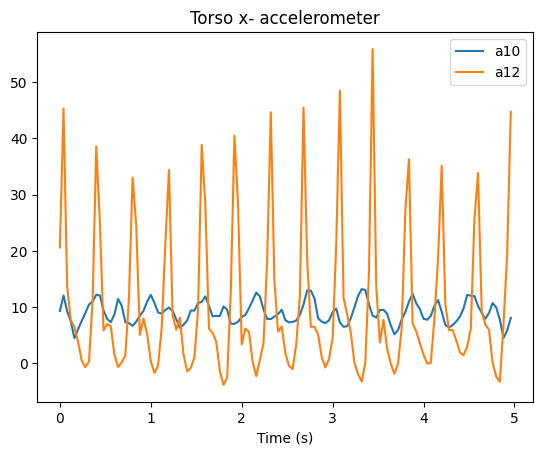

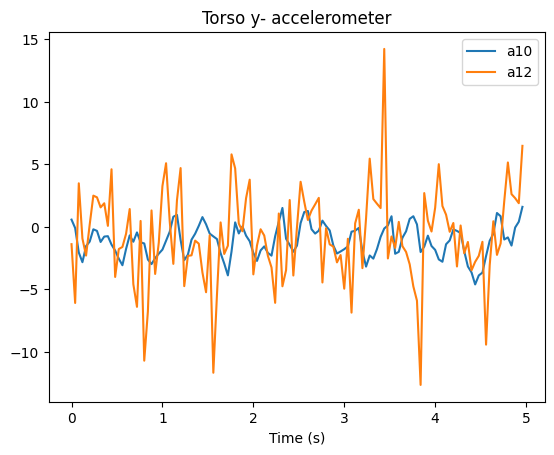

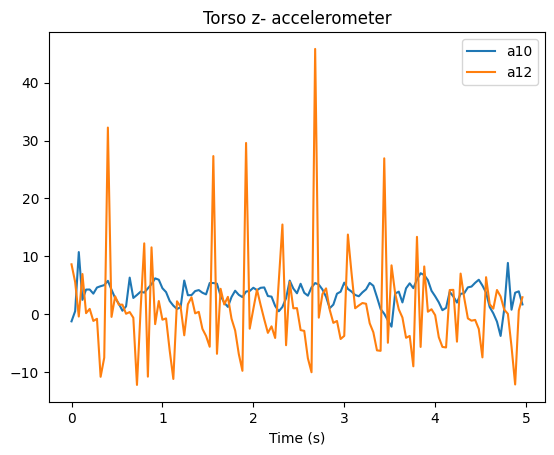

In [85]:
plot(a10["T_xacc"],a12["T_xacc"], 'Torso x- accelerometer')
plot(a10["T_yacc"],a12["T_yacc"], 'Torso y- accelerometer')
plot(a10["T_zacc"],a12["T_zacc"], 'Torso z- accelerometer')

We have plotted the torso accelerometer data of the three diferent axes: x, y and z. We can see the higher differences in the x-axis. Following this argument and in order to prevent "unnecessary" data, we will only plot the x-axis of all the different units. Let us now see some plots about arm data:

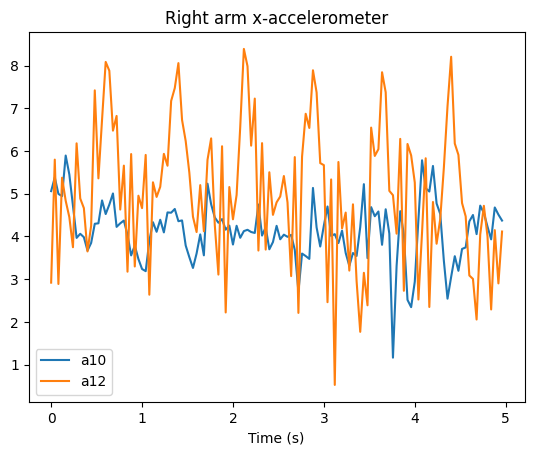

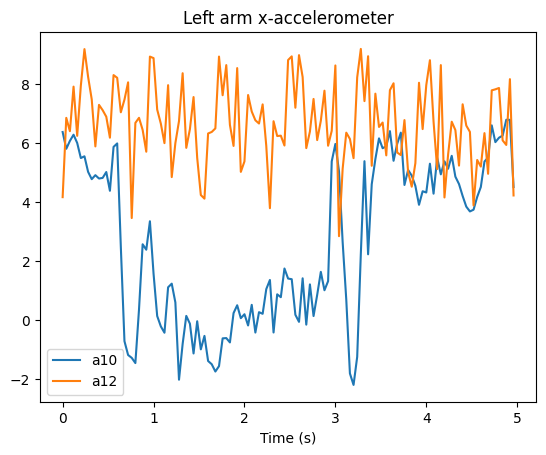

In [ ]:
plot(a10["RA_xacc"],a12["RA_xacc"], 'Right arm x-accelerometer')
plot(a10["LA_xacc"],a12["LA_xacc"], 'Left arm x-accelerometer')

Again, note that theoretically it should not be a difference when comparing left arm versus right arm values (and also when comparing right leg and left leg).  In these two previous plots we can see how in both cases activity 12 seems to be more demanding.

So, to sum up, we will only plot **x-axis** values and torso, right-arm and right-leg units.

**Torso data:**

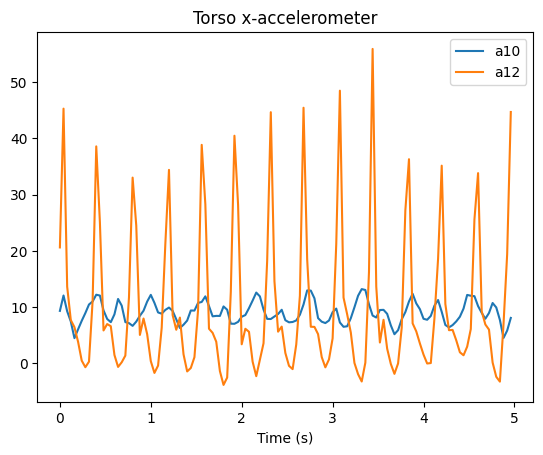

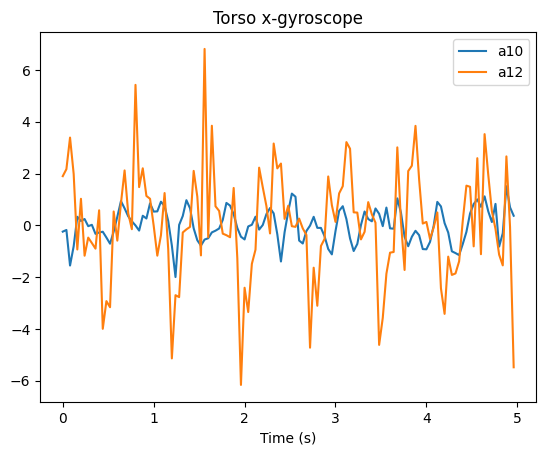

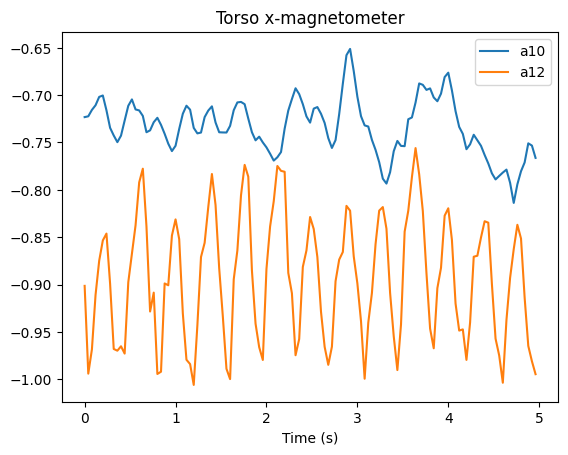

In [ ]:
plot(a10["T_xacc"],a12["T_xacc"], 'Torso x-accelerometer')
plot(a10["T_xgyro"],a12["T_xgyro"], 'Torso x-gyroscope')
plot(a10["T_xmag"],a12["T_xmag"], 'Torso x-magnetometer')

**Right arm data:**

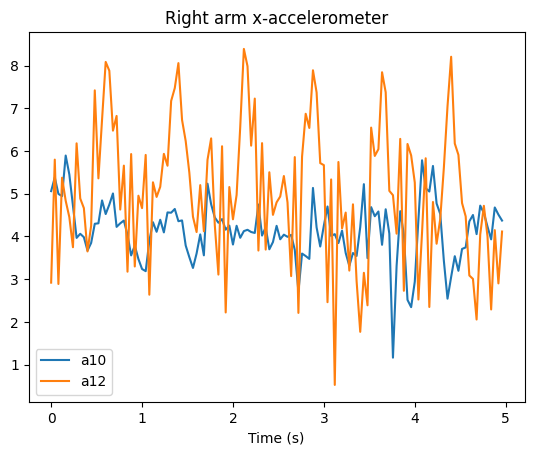

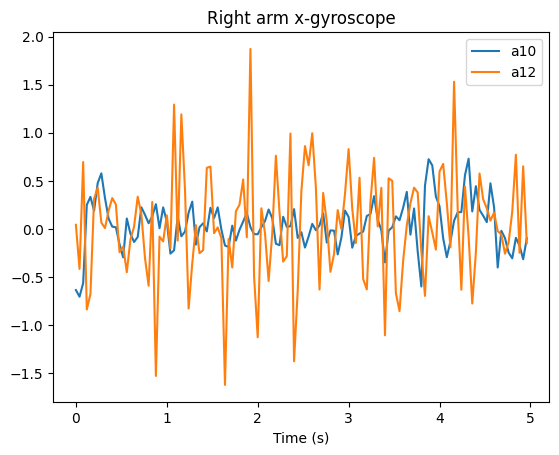

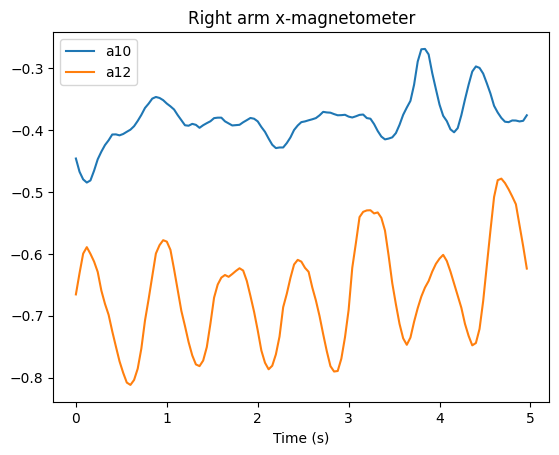

In [ ]:
plot(a10["RA_xacc"],a12["RA_xacc"], 'Right arm x-accelerometer')
plot(a10["RA_xgyro"],a12["RA_xgyro"], 'Right arm x-gyroscope')
plot(a10["RA_xmag"],a12["RA_xmag"], 'Right arm x-magnetometer')

**Right leg data:**

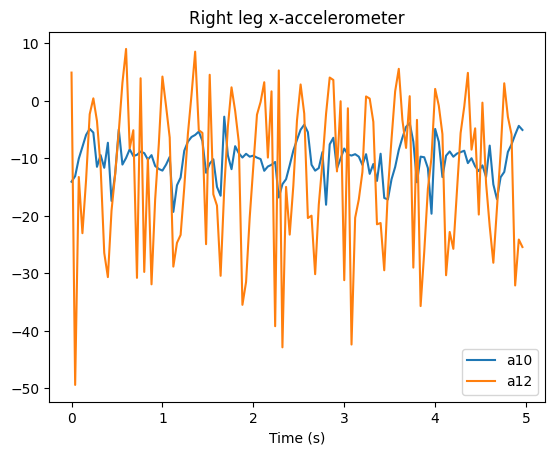

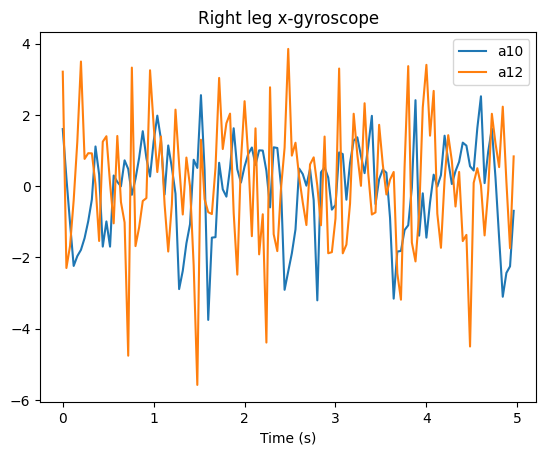

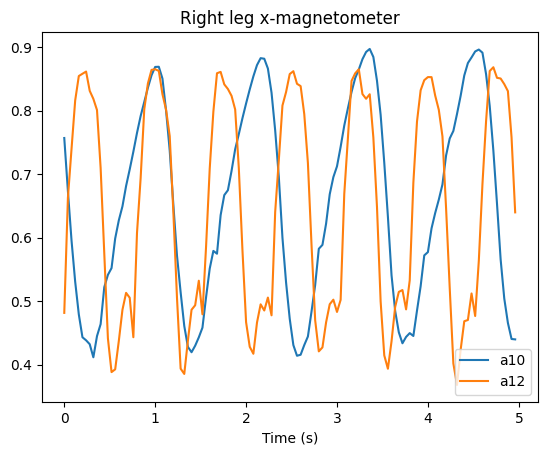

In [ ]:
plot(a10["RL_xacc"],a12["RL_xacc"], 'Right leg x-accelerometer')
plot(a10["RL_xgyro"],a12["RL_xgyro"], 'Right leg x-gyroscope')
plot(a10["RL_xmag"],a12["RL_xmag"], 'Right leg x-magnetometer')

**Conclusions**

Recall that we have seen data for one subject, subject 7.
The data from **a10** consist on walking on a treadmill with a speed of 4 km/h on a flat surface  while data from **a12** consist on running on a treadmill with a speed of 8 km/h.
As we can see in the previous plots, task a12 shows many more peaks than task a10 and with a considerably larger fluctuation. But this makes sense because one expects to have more movement/exhaustion running at 8km/h than not walking at 4km/h.


## Exercise 2


Exercise 2

Build a model (classifier) to predict the activity of a given subject. Decide on which features could be extracted from the data. For example:

- **mean, variance,skewness, and the kurtosis**. The distribution of each signal are approximately Normal. This means that we can take the first four statistical moments for each 5 second segment. By including the four moments, we are helping our models better learn the characteristic of each unique activity.
- n first values of the  the  [**autocorrelation**](https://en.wikipedia.org/wiki/Autocorrelation) sequence. In some time series analyses, such as in [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average), it is desirable to minimize autocorrelation so as to transform the series into a [stationary state](https://en.wikipedia.org/wiki/Stationary_process).
- n peaks of the [**discrete Fourier transform**](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)
of a segment with the corresponding frequencies.

Consider normalising all features between [0,1] and reduce the dimension of features using [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).


We propose 2 approaches to create your train/testing set.

(1) Train and test sets that contain shuffled samples from each user. So the model will train on data from every user and predict the activities from every user in the test set.
(2) Seven user's data will be used as the training set and only one user's data as the test set. The goal here is to predict the activities of a user that the model has never seen before. How good is the model generalising the problem?

For each approach, consider the following building framework:
1. Split data into train and holdout sets
2. Optimize model hyperparameters
3. Cross Validate model's performance by analyze learning curves

Finally, consider the follwing evaluation metrics:

**Accuracy** represents how close or far off a given set of measurements are to their true value.

**Precision**: percentage of classifications predicted to be positive are actually positive. **Precision is a measure of the failure to correctly predict positive classifications. **

$$\textbf{Precision} = \frac{TP}{TP + FP}, $$

where TP refers to True Positives and FP to False Positives.

**Recall** describes how well the model can identify points that belong to the positive class. **Recall is a measure of the failure in distinguishing between positive and negative classifications. **

$$\textbf{Recall} = \frac{TP}{TP + FN},$$

where FN corresponds to False Negatives.

Finally, the $f_{1} score$ is a weighted average of precision and recall. The  $f_{1} score$  is used to get a measure of both types of failures.

**Note: Make comments on the code to discuss the results.**


## Solution to exercise 2

## **Preprocessing**

As in exercise 1, we will create a new data frame but now taking into account different statistics : mean, variance, skewness, kurtosis and autocorrelation:

In [86]:
def columns_ex2(df):
    units = ["T","RA","LA","RL","LL"]
    statistic = ['mean','var','ske','kurt','autocorr']
    axis = ["x","y","z"]
    sensor = ["acc","gyro","mag"]

    columns = ["{}_{}{}_{}".format(unit, ax, sens) for stat in statistic for unit in units for sens in sensor for ax in axis]

    df.columns = columns
    return

In [ ]:
df = pd.DataFrame(columns=range(225)) #our dataframe will have 225 columns now, 5x5x3x3
columns_ex2(df)

Let us read all the information for each activity and subject. At the same time, for each segment we will extract just the previous statistics in order to avoid obtaining an enormous data frame.

In [ ]:
import os

base_path = '/content/drive/MyDrive/MASTER/SECOND SEMESTER/Health/Second assignment/data/'
activities= []
for i in range(1, 20): #activities
    activity_folder = os.path.join(base_path, 'a' + str(i).zfill(2))
    for j in range(1, 9): #subjects
        subject_folder = os.path.join(activity_folder, 'p' + str(j))

        for filename in os.listdir(subject_folder): #segments

            filepath = os.path.join(subject_folder, filename)
            aux = pd.read_csv(filepath, header=None)

            mean = aux.mean(axis = 0).tolist() # mean
            var = aux.var(axis = 0).tolist()# variance
            skewness = aux.skew(axis = 0).tolist()# skewness
            kurtosis = aux.kurtosis(axis = 0).tolist()# kurtosis
            autocorr = aux.apply(lambda col: col.autocorr(lag=1), axis=0).tolist()# autocorrelation

            #Create a unic list
            mean.extend(var + skewness + kurtosis + autocorr)

            # Append the segment information
            df.loc[len(df)] = mean

            # Append the activity
            activities.append(i)

# Create the target column using the activity_list
df['activity'] = activities

In [ ]:
df = pd.DataFrame(df)
df.to_csv('health', index=False) #we want to save the data frame in order to avoid doing this several times, because it takes some time

In [92]:
df = pd.read_csv("/content/health")

In [90]:
df

,T_xacc_mean,T_yacc_mean,T_zacc_mean,T_xgyro_mean,T_ygyro_mean,T_zgyro_mean,T_xmag_mean,T_ymag_mean,T_zmag_mean,RA_xacc_mean,...,LL_xacc_autocorr,LL_yacc_autocorr,LL_zacc_autocorr,LL_xgyro_autocorr,LL_ygyro_autocorr,LL_zgyro_autocorr,LL_xmag_autocorr,LL_ymag_autocorr,LL_zmag_autocorr,activity
0,7.908930,1.187504,5.680980,0.001086,0.012242,-0.002488,-0.793872,-0.072597,0.128345,0.558168,...,0.333131,-0.112822,0.234056,0.082706,0.086223,0.034678,-0.053197,-0.070769,0.014022,1
1,7.970894,1.140962,5.607750,0.001846,0.018806,-0.003486,-0.792875,-0.070723,0.136436,0.608212,...,0.203621,-0.065548,0.308853,0.130516,-0.036445,0.080351,-0.076369,-0.002470,-0.206861,1
2,7.978250,1.140865,5.598922,0.003308,0.022514,-0.003240,-0.791962,-0.070157,0.137123,0.644964,...,0.272134,0.004292,0.494905,0.028671,-0.109248,0.098514,0.096706,-0.040019,0.044699,1
3,7.938412,1.165260,5.648969,0.003788,0.023768,-0.003512,-0.793550,-0.071969,0.131983,0.591138,...,0.327981,0.211183,0.501562,0.091029,-0.089352,0.139112,-0.065841,0.048755,0.395282,1
4,7.975714,1.083150,5.606846,0.004897,0.026123,-0.003726,-0.790726,-0.068490,0.135897,0.679134,...,0.203104,0.037050,0.434040,0.038089,0.092971,0.178767,-0.129879,-0.146344,-0.020801,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,9.636061,-0.817827,0.666605,-0.166818,0.169352,-0.102916,-0.706365,0.223675,0.178247,3.288036,...,0.567479,0.274508,0.384052,0.718186,0.780971,0.831857,0.968625,0.982225,0.997636,19
9116,9.252281,-0.822683,0.074980,-0.127898,-0.085208,0.086088,-0.743356,-0.408631,-0.091266,7.935659,...,0.616910,0.420535,0.388619,0.528666,0.628322,0.859852,0.986469,0.984700,0.988847,19
9117,8.280854,-1.491537,-1.810327,-0.207825,0.000424,-0.033526,-0.743045,-0.232313,-0.205412,8.690373,...,0.539801,0.098907,0.454792,0.562494,0.717805,0.812710,0.988417,0.988050,0.985848,19
9118,9.395641,-0.286475,1.697817,-0.091815,-0.012066,-0.024357,-0.710677,-0.442787,-0.280343,8.830490,...,0.461454,0.113729,0.389598,0.363290,0.481939,0.752884,0.971156,0.980070,0.970736,19


As expected, we have 9120 rows (60x8x19) and 226 columns, one extra column to detect what activity we are talking about.

Let us define a Learning Curve function in order to better understanding our later classificators.

In [75]:
import matplotlib.pyplot as plt
def Learning_Curve(clf, X, y):

  train_sizes, train_scores, test_scores = learning_curve(clf,X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)


  plt.plot(train_sizes, train_mean, color="black",  label="Training score")
  plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")


  plt.title("Learning Curve")
  plt.xlabel("Training Set Size")
  plt.ylabel("Accuracy Score")
  plt.legend()
  plt.show()

# **First approach**

The first approach consists on having train and test sets that contain shuffled samples from each user, predicting the activities from every user in the test set. As the indications suggest us, we will normalize all features between [0,1] and reduce the dimension of features using PCA.

In [93]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score, learning_curve, GridSearchCV
from sklearn.decomposition import PCA

# Train/test split
X = df.iloc[:, :-1]
y = df['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, shuffle = True)

# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = scaler.fit_transform(X_test)

# PCA, 90%
pca = PCA(n_components = 0.9)
X_train_new = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_test_new= pd.DataFrame(pca.transform(X_test_scaled))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [94]:
features = pca.explained_variance_ratio_
len(features)
#sum(features)

48

Note that now we just have 48 features, instead of 225 that we had before almost. PCA has helped us to "eliminate" almost 80% of the features!

Let us try different classificators: we will try three different ones:
- SVM
- XGB
- Random Forest


## **Support Vector Machines**

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_new, y_train)

# Predict the labels of the test set
y_pred_svm = clf_svm.predict(X_test_new)

# Calculate the accuracy of the classifier
scores = cross_val_score(clf_svm, X_train_new, y_train, cv=5)
print("%.5f mean accuracy of the cross validation" %(scores.mean()))

activities = ['activity' + str(i).zfill(2) for i in range(1, 20)]

print(classification_report(y_test, y_pred_svm,target_names = activities))

0.99044 mean accuracy of the cross validation
              precision    recall  f1-score   support

  activity01       1.00      1.00      1.00       156
  activity02       0.98      1.00      0.99       140
  activity03       1.00      1.00      1.00       163
  activity04       1.00      1.00      1.00       147
  activity05       0.99      1.00      1.00       133
  activity06       1.00      1.00      1.00       137
  activity07       0.92      0.93      0.92       162
  activity08       0.90      0.88      0.89       128
  activity09       1.00      0.99      1.00       148
  activity10       1.00      1.00      1.00       152
  activity11       0.99      1.00      1.00       141
  activity12       1.00      1.00      1.00       143
  activity13       1.00      1.00      1.00       141
  activity14       1.00      1.00      1.00       129
  activity15       1.00      1.00      1.00       145
  activity16       1.00      1.00      1.00       138
  activity17       1.00      1.00  

Let us explore the learning curve for our SVM classifier.

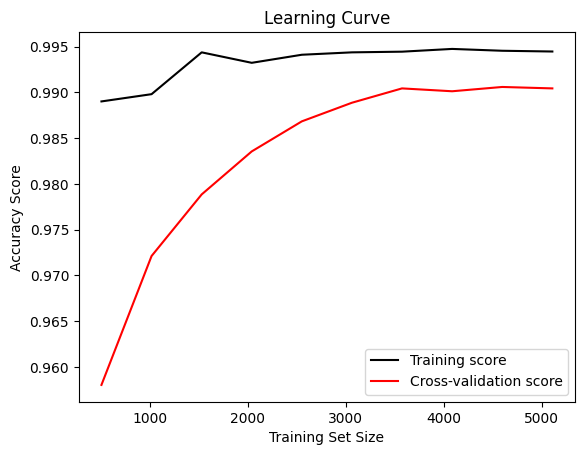

In [100]:
Learning_Curve(clf_svm, X_train_new, y_train)

Another interesting thing to study is the following table, where we have better results when we only have numbers on the diagonal.

In [101]:
pd.crosstab(y_test, y_pred_svm, rownames=['Real Activity'], colnames=['Predicted Activity'])

Predicted Activity,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Real Activity,,,,,,,,,,,,,,,,,,,
1,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,137,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,2,0,0,0,0,150,10,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,1,0,13,113,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,147,0,1,0,0,0,0,0,0,0,0


## **XGBoost**

In [103]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

clf_xgb = xgb.XGBClassifier(random_state=42)
le = LabelEncoder()# needed for xgboost
y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.fit_transform(y_test)
clf_xgb.fit(X_train_new, y_train_xgb)

# Predict the labels of the test set
y_pred_xgb = clf_xgb.predict(X_test_new)

# Calculate the accuracy of the classifier
scores = cross_val_score(clf_xgb, X_train_new, y_train_xgb, cv=5)
print("%0.5f mean accuracy of the cross validation" % (scores.mean()))

activities = ['activity' + str(i).zfill(2) for i in range(1, 20)]

print(classification_report(y_test_xgb, y_pred_xgb,target_names = activities))

0.98355 mean accuracy of the cross validation
              precision    recall  f1-score   support

  activity01       1.00      1.00      1.00       156
  activity02       0.99      1.00      0.99       140
  activity03       1.00      0.98      0.99       163
  activity04       1.00      1.00      1.00       147
  activity05       0.98      1.00      0.99       133
  activity06       0.99      0.99      0.99       137
  activity07       0.92      0.89      0.90       162
  activity08       0.86      0.88      0.87       128
  activity09       0.99      0.99      0.99       148
  activity10       0.98      0.97      0.98       152
  activity11       0.97      0.98      0.97       141
  activity12       0.99      1.00      1.00       143
  activity13       0.99      1.00      1.00       141
  activity14       1.00      0.99      1.00       129
  activity15       1.00      1.00      1.00       145
  activity16       1.00      1.00      1.00       138
  activity17       1.00      1.00  

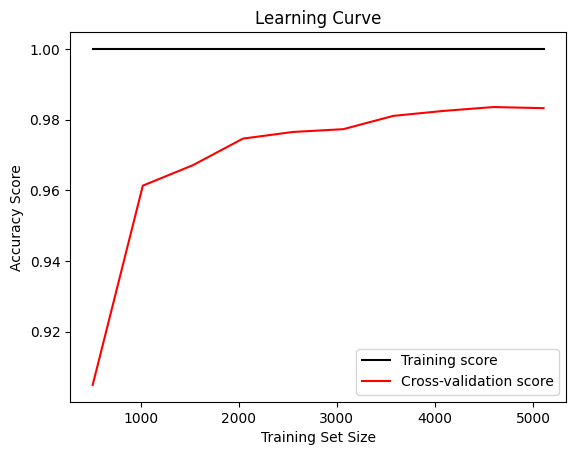

In [ ]:
Learning_Curve(clf_xgb, X_train_new, y_train_xgb)

In [104]:
pd.crosstab(y_test, y_pred_xgb, rownames=['Real Activity'], colnames=['Predicted Activity'])

Predicted Activity,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Real Activity,,,,,,,,,,,,,,,,,,,
1,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,159,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2
4,0,0,0,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,135,0,2,0,0,0,0,0,0,0,0,0,0,0
7,0,2,0,0,1,1,144,14,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,1,12,112,0,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,0,146,0,2,0,0,0,0,0,0,0,0


## **Random Forest**

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_new, y_train)

# Predict the labels of the test set
y_pred_rf = clf_rf.predict(X_test_new)

# Calculate the accuracy of the classifier
scores = cross_val_score(clf_rf, X_train_new, y_train, cv=5)
print("%0.5f mean accuracy of the cross validation" % (scores.mean()))

activities = ['activity' + str(i).zfill(2) for i in range(1, 20)]

print(classification_report(y_test, y_pred_rf, target_names= activities))

0.98669 mean accuracy of the cross validation
              precision    recall  f1-score   support

  activity01       1.00      1.00      1.00       156
  activity02       0.96      0.99      0.98       140
  activity03       1.00      1.00      1.00       163
  activity04       1.00      1.00      1.00       147
  activity05       0.99      1.00      0.99       133
  activity06       0.99      1.00      1.00       137
  activity07       0.91      0.85      0.88       162
  activity08       0.84      0.87      0.85       128
  activity09       1.00      0.99      1.00       148
  activity10       1.00      1.00      1.00       152
  activity11       0.99      1.00      1.00       141
  activity12       0.99      1.00      1.00       143
  activity13       1.00      1.00      1.00       141
  activity14       1.00      1.00      1.00       129
  activity15       1.00      1.00      1.00       145
  activity16       1.00      0.99      1.00       138
  activity17       1.00      1.00  

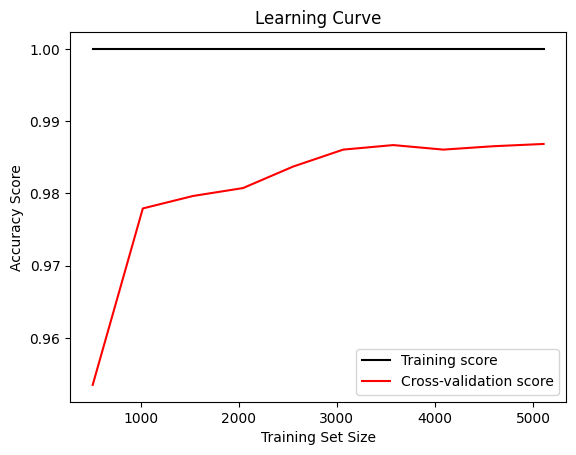

In [ ]:
Learning_Curve(clf_rf, X_train_new, y_train)

In [ ]:
pd.crosstab(y_test, y_pred_rf, rownames=['Real Activity'], colnames=['Predicted Activity'])

Predicted Activity,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Real Activity,,,,,,,,,,,,,,,,,,,
1,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,139,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,137,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,6,0,0,0,0,137,19,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,1,13,111,0,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,0,147,0,1,0,0,0,0,0,0,0,0


## **Summary and hyperparameter tuning**

Let's summarize all the information that we have obtained with the different classifiers

In [ ]:
data = {'Classifier': ['SVM', 'XGboost', 'Random Forest'],
        'Mean-Accuracy': [0.99044, 0.98355, 0.98669],
        'Precision':[0.99 ,0.98 ,0.98],
        'Recall':[0.99 ,0.98 ,0.98],
        'f1-score':[0.99, 0.98 ,0.98 ]}
pd.DataFrame(data)

,Classifier,Mean-Accuracy,Precision,Recall,f1-score
0,SVM,0.99044,0.99,0.99,0.99
1,XGboost,0.98355,0.98,0.98,0.98
2,Random Forest,0.98669,0.98,0.98,0.98


As we can see, it seems that SVM performs a little better than the others classifiers. Hence, let us do some hyperparameter tuning with the SVM classifier.

In [106]:
clf_svm = SVC(random_state=42)

#Hyperparameter Optimization
param_grid = { 'C':[0.01,0.1,1,100,1000], 'kernel':['rbf','sigmoid','linear'],'degree':[1,2,3,4,5,6]} #by default we have: C=1.0, kernel='rbf', degree=3

#Run the grid search
grid_obj = GridSearchCV(clf_svm, param_grid,cv=5, verbose = 1)
grid_obj = grid_obj.fit(X_train_new, y_train)

best_params = grid_obj.best_params_
print("The optimal parameters are:", best_params)
#Set the classifier to the best combination of parameters
est = grid_obj.best_estimator_

est.fit(X_train_new, y_train)
# Predict the labels of the test set
y_pred = est.predict(X_test_new)

# Calculate the accuracy of the classifier
scores = cross_val_score(est, X_train_new, y_train, cv=5)
print("%0.5f mean accuracy of the cross validation" % (scores.mean()))

activities = ['activity' + str(i).zfill(2) for i in range(1, 20)]

print(classification_report(y_test, y_pred,target_names = activities))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
The optimal parameters are: {'C': 100, 'degree': 1, 'kernel': 'rbf'}
0.99170 mean accuracy of the cross validation
              precision    recall  f1-score   support

  activity01       1.00      1.00      1.00       156
  activity02       1.00      1.00      1.00       140
  activity03       1.00      1.00      1.00       163
  activity04       1.00      1.00      1.00       147
  activity05       1.00      1.00      1.00       133
  activity06       1.00      1.00      1.00       137
  activity07       0.92      0.96      0.94       162
  activity08       0.95      0.90      0.92       128
  activity09       1.00      1.00      1.00       148
  activity10       1.00      1.00      1.00       152
  activity11       1.00      1.00      1.00       141
  activity12       1.00      1.00      1.00       143
  activity13       1.00      1.00      1.00       141
  activity14       1.00      1.00      1.00       129
  activity15

In [108]:
pd.crosstab(y_test, y_pred, rownames=['Real Activity'], colnames=['Predicted Activity'])

Predicted Activity,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Real Activity,,,,,,,,,,,,,,,,,,,
1,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,137,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,156,6,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,13,115,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,148,0,0,0,0,0,0,0,0,0,0


As a consequence of the hyperparameter tuning we got a mean accuracy of the cross validation of 0.99170 which slightly improves the previous results. Having a look at the previous table note that the classifier is confused when determining activities 7 and 8, which are: standing in an elevator still (A7)
and moving around in an elevator (A8). It does not seem to be a serious error, since a priori these activities are similar

# **Second approach**

The second approach consists on using seven user's as the training set and only one user's data as the test set. We well proceed in a similar way than before, normalizing all features between [0,1] and reducing the dimension of features using PCA.


In [110]:
#We read again the initial dataset
df = pd.read_csv("/content/health")
df.head()

,T_xacc_mean,T_yacc_mean,T_zacc_mean,T_xgyro_mean,T_ygyro_mean,T_zgyro_mean,T_xmag_mean,T_ymag_mean,T_zmag_mean,RA_xacc_mean,...,LL_xacc_autocorr,LL_yacc_autocorr,LL_zacc_autocorr,LL_xgyro_autocorr,LL_ygyro_autocorr,LL_zgyro_autocorr,LL_xmag_autocorr,LL_ymag_autocorr,LL_zmag_autocorr,activity
0,7.908930,1.187504,5.680980,0.001086,0.012242,-0.002488,-0.793872,-0.072597,0.128345,0.558168,...,0.333131,-0.112822,0.234056,0.082706,0.086223,0.034678,-0.053197,-0.070769,0.014022,1
1,7.970894,1.140962,5.607750,0.001846,0.018806,-0.003486,-0.792875,-0.070723,0.136436,0.608212,...,0.203621,-0.065548,0.308853,0.130516,-0.036445,0.080351,-0.076369,-0.002470,-0.206861,1
2,7.978250,1.140865,5.598922,0.003308,0.022514,-0.003240,-0.791962,-0.070157,0.137123,0.644964,...,0.272134,0.004292,0.494905,0.028671,-0.109248,0.098514,0.096706,-0.040019,0.044699,1
3,7.938412,1.165260,5.648969,0.003788,0.023768,-0.003512,-0.793550,-0.071969,0.131983,0.591138,...,0.327981,0.211183,0.501562,0.091029,-0.089352,0.139112,-0.065841,0.048755,0.395282,1
4,7.975714,1.083150,5.606846,0.004897,0.026123,-0.003726,-0.790726,-0.068490,0.135897,0.679134,...,0.203104,0.037050,0.434040,0.038089,0.092971,0.178767,-0.129879,-0.146344,-0.020801,1


Let us prepare the data in order to be able to handle the second approach; that  is, we will add the subject information in one column.


In [111]:
p_values = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']
k=0
for i in range(1,len(df)+1):
    if k % 8 == 0:
        k = 0
    df.loc[i-1, 'subject'] = p_values[k]
    if i%60==0:
      k += 1

In [112]:
df.head()

,T_xacc_mean,T_yacc_mean,T_zacc_mean,T_xgyro_mean,T_ygyro_mean,T_zgyro_mean,T_xmag_mean,T_ymag_mean,T_zmag_mean,RA_xacc_mean,...,LL_yacc_autocorr,LL_zacc_autocorr,LL_xgyro_autocorr,LL_ygyro_autocorr,LL_zgyro_autocorr,LL_xmag_autocorr,LL_ymag_autocorr,LL_zmag_autocorr,activity,subject
0,7.908930,1.187504,5.680980,0.001086,0.012242,-0.002488,-0.793872,-0.072597,0.128345,0.558168,...,-0.112822,0.234056,0.082706,0.086223,0.034678,-0.053197,-0.070769,0.014022,1,p1
1,7.970894,1.140962,5.607750,0.001846,0.018806,-0.003486,-0.792875,-0.070723,0.136436,0.608212,...,-0.065548,0.308853,0.130516,-0.036445,0.080351,-0.076369,-0.002470,-0.206861,1,p1
2,7.978250,1.140865,5.598922,0.003308,0.022514,-0.003240,-0.791962,-0.070157,0.137123,0.644964,...,0.004292,0.494905,0.028671,-0.109248,0.098514,0.096706,-0.040019,0.044699,1,p1
3,7.938412,1.165260,5.648969,0.003788,0.023768,-0.003512,-0.793550,-0.071969,0.131983,0.591138,...,0.211183,0.501562,0.091029,-0.089352,0.139112,-0.065841,0.048755,0.395282,1,p1
4,7.975714,1.083150,5.606846,0.004897,0.026123,-0.003726,-0.790726,-0.068490,0.135897,0.679134,...,0.037050,0.434040,0.038089,0.092971,0.178767,-0.129879,-0.146344,-0.020801,1,p1


Let us try to predict the different activities for the subject 1.

In [113]:
X_train = df[df['subject'] != 'p1']
X_test = df[df['subject'] == 'p1']
y_train = X_train['activity']
y_test = X_test['activity']

In [114]:
#We do not need these columns anymore
X_train = X_train.drop(columns= ['activity', 'subject'])
X_test =  X_test.drop(columns= ['activity', 'subject'])

In [115]:
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#PCA, 90%
pca = PCA(n_components = 0.9)
X_train_new = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_test_new= pd.DataFrame(pca.transform(X_test_scaled))

In [116]:
features = pca.explained_variance_ratio_
len(features)

45

This time we only keep 45 columns.

Let us repeat the same classifiers as in the first approach (and also proceeding in a very similar way):
- SVM
- XGB
- Random Forest

## **Support Vector Machines**

In [118]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_new, y_train)

# Predict the labels of the test set
y_pred_svm = clf_svm.predict(X_test_new)

# Calculate the accuracy of the classifier
scores = cross_val_score(clf_svm, X_train_new, y_train, cv=5)
print("%.5f mean accuracy of the cross validation" %(scores.mean()))

activities = ['activity' + str(i).zfill(2) for i in range(1, 20)]

print(classification_report(y_test, y_pred_svm,target_names = activities))

0.94160 mean accuracy of the cross validation
              precision    recall  f1-score   support

  activity01       1.00      1.00      1.00        60
  activity02       0.00      0.00      0.00        60
  activity03       1.00      1.00      1.00        60
  activity04       1.00      1.00      1.00        60
  activity05       1.00      1.00      1.00        60
  activity06       1.00      0.98      0.99        60
  activity07       0.44      0.80      0.57        60
  activity08       0.84      0.98      0.91        60
  activity09       1.00      0.88      0.94        60
  activity10       0.67      1.00      0.80        60
  activity11       1.00      0.62      0.76        60
  activity12       1.00      1.00      1.00        60
  activity13       1.00      0.45      0.62        60
  activity14       1.00      0.97      0.98        60
  activity15       1.00      1.00      1.00        60
  activity16       1.00      1.00      1.00        60
  activity17       1.00      1.00  

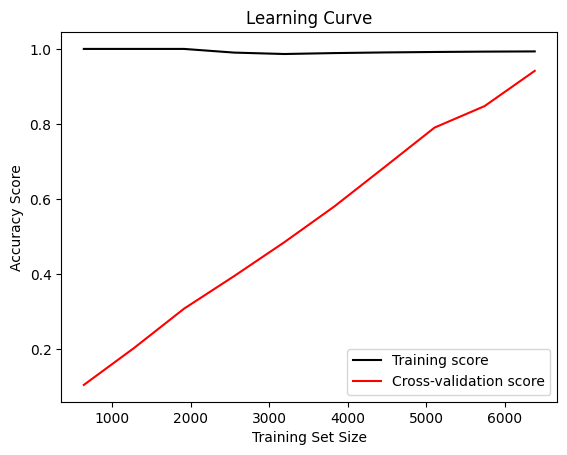

In [120]:
Learning_Curve(clf_svm, X_train_new, y_train)

In [122]:
pd.crosstab(y_test, y_pred_svm, rownames=['Real Activity'], colnames=['Predicted Activity'])

Predicted Activity,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Real Activity,,,,,,,,,,,,,,,,,,,
1,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,59,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,6,0,0,0,0,48,6,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,59,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,53,7,0,0,0,0,0,0,0,0,0


## **XGBoost**

In [123]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(random_state=42)
le = LabelEncoder()# needed for xgboost
y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.fit_transform(y_test)
clf_xgb.fit(X_train_new, y_train_xgb)

# Predict the labels of the test set
y_pred_xgb = clf_xgb.predict(X_test_new)

# Calculate the accuracy of the classifier
scores = cross_val_score(clf_xgb, X_train_new, y_train_xgb, cv=5)
print("%0.5f mean accuracy of the cross validation" % (scores.mean()))

activities = ['activity' + str(i).zfill(2) for i in range(1, 20)]

print(classification_report(y_test_xgb, y_pred_xgb,target_names = activities))

0.92143 mean accuracy of the cross validation
              precision    recall  f1-score   support

  activity01       1.00      0.98      0.99        60
  activity02       0.62      0.47      0.53        60
  activity03       1.00      1.00      1.00        60
  activity04       1.00      1.00      1.00        60
  activity05       1.00      0.98      0.99        60
  activity06       0.76      0.83      0.79        60
  activity07       0.49      0.55      0.52        60
  activity08       0.64      0.68      0.66        60
  activity09       0.72      0.48      0.58        60
  activity10       0.42      1.00      0.59        60
  activity11       0.71      0.48      0.57        60
  activity12       0.83      1.00      0.91        60
  activity13       0.96      0.37      0.53        60
  activity14       1.00      0.18      0.31        60
  activity15       1.00      1.00      1.00        60
  activity16       1.00      1.00      1.00        60
  activity17       1.00      1.00  

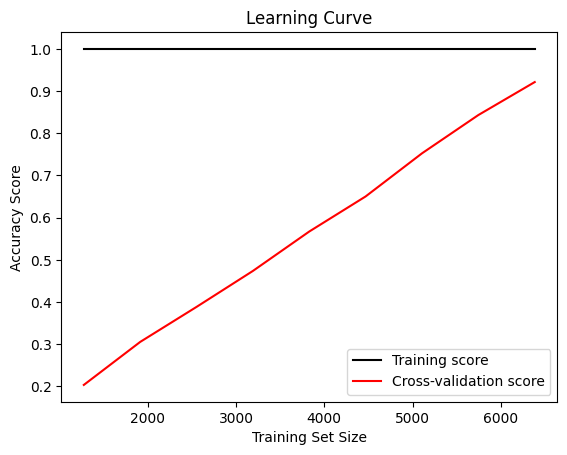

In [124]:
Learning_Curve(clf_xgb, X_train_new, y_train_xgb)

In [125]:
pd.crosstab(y_test, y_pred_xgb, rownames=['Real Activity'], colnames=['Predicted Activity'])

Predicted Activity,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Real Activity,,,,,,,,,,,,,,,,,,,
1,59,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,28,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,59,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,50,1,0,6,0,0,0,0,0,0,0,0,3,0
7,0,12,0,0,0,0,33,15,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,19
9,0,0,0,0,0,16,0,0,29,15,0,0,0,0,0,0,0,0,0


## **Random Forest**

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_new, y_train)

# Predict the labels of the test set
y_pred_rf = clf_rf.predict(X_test_new)

# Calculate the accuracy of the classifier
scores = cross_val_score(clf_rf, X_train_new, y_train, cv=5)
print("%0.5f mean accuracy of the cross validation" % (scores.mean()))

activities = ['activity' + str(i).zfill(2) for i in range(1, 20)]

print(classification_report(y_test, y_pred_rf, target_names= activities))

0.93058 mean accuracy of the cross validation
              precision    recall  f1-score   support

  activity01       1.00      0.98      0.99        60
  activity02       0.68      0.25      0.37        60
  activity03       1.00      1.00      1.00        60
  activity04       1.00      1.00      1.00        60
  activity05       1.00      0.98      0.99        60
  activity06       1.00      0.98      0.99        60
  activity07       0.43      0.58      0.50        60
  activity08       0.53      0.77      0.63        60
  activity09       0.97      0.65      0.78        60
  activity10       0.46      1.00      0.63        60
  activity11       1.00      0.30      0.46        60
  activity12       0.91      1.00      0.95        60
  activity13       0.97      0.47      0.63        60
  activity14       1.00      0.62      0.76        60
  activity15       1.00      1.00      1.00        60
  activity16       1.00      1.00      1.00        60
  activity17       1.00      1.00  

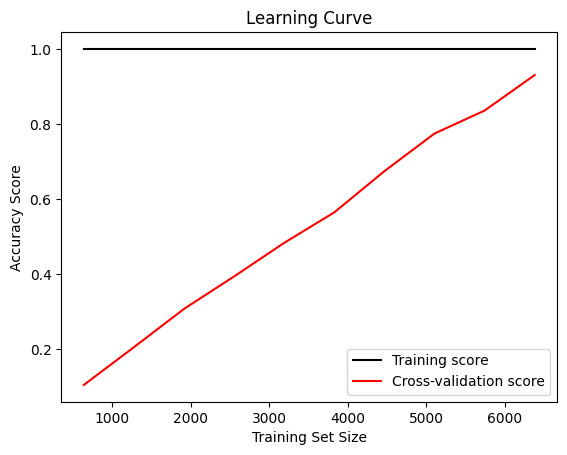

In [127]:
Learning_Curve(clf_rf, X_train_new, y_train)

In [129]:
pd.crosstab(y_test, y_pred_rf, rownames=['Real Activity'], colnames=['Predicted Activity'])

Predicted Activity,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Real Activity,,,,,,,,,,,,,,,,,,,
1,59,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,15,0,0,0,0,44,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,59,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,7,0,0,0,0,35,18,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,46,0,0,0,0,0,0,0,0,0,0,13
9,0,0,0,0,0,0,0,0,39,21,0,0,0,0,0,0,0,0,0


## **Summary and hyperparameter tuning**

Let's summarize all the information that we have obtained with the different classifiers

In [128]:
data = {'Classifier': ['SVM', 'XGboost', 'Random Forest'],
        'Mean-Accuracy': [0.94160, 0.92143, 0.93058],
        'Precision':[0.87 ,0.83 ,0.87],
        'Recall':[0.87 ,0.78 ,0.81],
        'f1-score':[0.86, 0.77 ,0.81 ]}
pd.DataFrame(data)

,Classifier,Mean-Accuracy,Precision,Recall,f1-score
0,SVM,0.94160,0.87,0.87,0.86
1,XGboost,0.92143,0.83,0.78,0.77
2,Random Forest,0.93058,0.87,0.81,0.81


Again,it seems that SVM performs  better than the others classifiers. Hence, let us do some hyperparameter tuning with the SVM classifier.

In [130]:
clf_svm = SVC(random_state=42)

#Hyperparameter Optimization
param_grid = { 'C':[0.01,0.1,1,100,1000], 'kernel':['rbf','sigmoid','linear'],'degree':[1,2,3,4,5,6]} #by default we have: C=1.0, kernel='rbf', degree=3

#Run the grid search
grid_obj = GridSearchCV(clf_svm, param_grid,cv=5, verbose = 1)
grid_obj = grid_obj.fit(X_train_new, y_train)

best_params = grid_obj.best_params_
print("The optimal parameters are:", best_params)
#Set the classifier to the best combination of parameters
est = grid_obj.best_estimator_

est.fit(X_train_new, y_train)
# Predict the labels of the test set
y_pred = est.predict(X_test_new)

# Calculate the accuracy of the classifier
scores = cross_val_score(est, X_train_new, y_train, cv=5)
print("%0.5f mean accuracy of the cross validation" % (scores.mean()))

activities = ['activity' + str(i).zfill(2) for i in range(1, 20)]

print(classification_report(y_test, y_pred,target_names = activities))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
The optimal parameters are: {'C': 1, 'degree': 1, 'kernel': 'rbf'}
0.94160 mean accuracy of the cross validation
              precision    recall  f1-score   support

  activity01       1.00      1.00      1.00        60
  activity02       0.00      0.00      0.00        60
  activity03       1.00      1.00      1.00        60
  activity04       1.00      1.00      1.00        60
  activity05       1.00      1.00      1.00        60
  activity06       1.00      0.98      0.99        60
  activity07       0.44      0.80      0.57        60
  activity08       0.84      0.98      0.91        60
  activity09       1.00      0.88      0.94        60
  activity10       0.67      1.00      0.80        60
  activity11       1.00      0.62      0.76        60
  activity12       1.00      1.00      1.00        60
  activity13       1.00      0.45      0.62        60
  activity14       1.00      0.97      0.98        60
  activity15  

In [131]:
pd.crosstab(y_test, y_pred, rownames=['Real Activity'], colnames=['Predicted Activity'])

Predicted Activity,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Real Activity,,,,,,,,,,,,,,,,,,,
1,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,59,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,6,0,0,0,0,48,6,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,59,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,53,7,0,0,0,0,0,0,0,0,0


This time we didn't improve doing the accuracy of the classificator doing hyperparameter tuning, in fact, we ended choosing the same parameters as before. Note that the classificator predicted wrong all the 2-activities, coconfusing them with activity 7. Also note that: (A7)  is standing in an elevator still and (A2) is just standing. (between other errors)

## **General conclusion**

We conclude that the first approach performs better than the second one. It makes sense, since in the first approach we take into account information from all users while in the second approach we are hiding the complete information of a user doing the different activities. We also tried (in the second approach) changing the subject, but the results varied slightly. Furthermore, since we are trying to predict a single individual, it is more difficult because each person may have different patterns or ways of carrying out a certain exercise, which makes prediction difficult.